In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"
key = "z"
quantile = "2"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

10it [00:00, 99.14it/s]

17it [00:00, 87.97it/s]

29it [00:00, 94.72it/s]

41it [00:00, 99.04it/s]

53it [00:00, 103.70it/s]

65it [00:00, 106.36it/s]

77it [00:00, 109.69it/s]

89it [00:00, 112.43it/s]

101it [00:00, 112.90it/s]

112it [00:01, 111.84it/s]

125it [00:01, 114.77it/s]

138it [00:01, 116.44it/s]

151it [00:01, 117.82it/s]

164it [00:01, 119.24it/s]

177it [00:01, 120.22it/s]

190it [00:01, 121.55it/s]

203it [00:01, 121.93it/s]

216it [00:01, 122.74it/s]

229it [00:01, 122.25it/s]

242it [00:02, 121.19it/s]

255it [00:02, 109.16it/s]

267it [00:02, 111.94it/s]

280it [00:02, 115.14it/s]

293it [00:02, 117.38it/s]

306it [00:02, 119.38it/s]

319it [00:02, 120.53it/s]

332it [00:02, 119.88it/s]

345it [00:02, 118.06it/s]

357it [00:03, 117.71it/s]

369it [00:03, 116.82it/s]

381it [00:03, 116.94it/s]

393it [00:03, 114.53it/s]

405it [00:03, 102.58it/s]

417it [00:03, 104.77it/s]

430it [00:03, 109.60it/s]

443it [00:03, 113.38it/s]

456it [00:03, 115.78it/s]

469it [00:04, 117.50it/s]

481it [00:04, 110.48it/s]

493it [00:04, 111.74it/s]

505it [00:04, 102.56it/s]

518it [00:04, 107.47it/s]

530it [00:04, 110.55it/s]

543it [00:04, 113.62it/s]

556it [00:04, 115.56it/s]

568it [00:05, 102.87it/s]

579it [00:05, 96.42it/s] 

590it [00:05, 99.56it/s]

601it [00:05, 98.85it/s]

614it [00:05, 104.79it/s]

627it [00:05, 108.95it/s]

640it [00:05, 112.65it/s]

653it [00:05, 114.81it/s]

666it [00:05, 116.19it/s]

678it [00:06, 116.71it/s]

691it [00:06, 118.00it/s]

703it [00:06, 113.73it/s]

715it [00:06, 107.05it/s]

728it [00:06, 111.15it/s]

740it [00:06, 104.50it/s]

752it [00:06, 108.64it/s]

764it [00:06, 111.66it/s]

776it [00:06, 109.31it/s]

788it [00:07, 110.67it/s]

800it [00:07, 112.49it/s]

813it [00:07, 114.92it/s]

825it [00:07, 114.45it/s]

838it [00:07, 116.11it/s]

850it [00:07, 111.31it/s]

862it [00:07, 113.77it/s]

874it [00:07, 113.57it/s]

887it [00:07, 116.60it/s]

900it [00:07, 117.97it/s]

912it [00:08, 117.85it/s]

924it [00:08, 118.20it/s]

937it [00:08, 118.89it/s]

949it [00:08, 117.84it/s]

961it [00:08, 105.82it/s]

974it [00:08, 110.68it/s]

987it [00:08, 114.32it/s]

1000it [00:08, 115.95it/s]

1013it [00:08, 117.88it/s]

1026it [00:09, 118.67it/s]

1039it [00:09, 119.35it/s]

1051it [00:09, 117.18it/s]

1064it [00:09, 118.50it/s]

1077it [00:09, 119.82it/s]

1090it [00:09, 120.47it/s]

1103it [00:09, 120.48it/s]

1116it [00:09, 115.98it/s]

1128it [00:09, 111.51it/s]

1140it [00:10, 98.02it/s] 

1151it [00:10, 100.82it/s]

1164it [00:10, 105.93it/s]

1176it [00:10, 109.59it/s]

1189it [00:10, 112.97it/s]

1202it [00:10, 115.13it/s]

1215it [00:10, 116.48it/s]

1227it [00:10, 117.16it/s]

1240it [00:10, 118.04it/s]

1252it [00:11, 117.41it/s]

1264it [00:11, 116.52it/s]

1276it [00:11, 116.68it/s]

1288it [00:11, 117.10it/s]

1300it [00:11, 117.66it/s]

1312it [00:11, 117.66it/s]

1324it [00:11, 106.69it/s]

1336it [00:11, 110.12it/s]

1348it [00:11, 112.49it/s]

1360it [00:12, 113.57it/s]

1372it [00:12, 114.24it/s]

1384it [00:12, 114.07it/s]

1396it [00:12, 108.77it/s]

1407it [00:12, 91.68it/s] 

1419it [00:12, 98.14it/s]

1432it [00:12, 103.95it/s]

1444it [00:12, 106.33it/s]

1456it [00:12, 108.50it/s]

1469it [00:13, 112.50it/s]

1482it [00:13, 114.91it/s]

1494it [00:13, 116.07it/s]

1506it [00:13, 115.82it/s]

1518it [00:13, 116.47it/s]

1531it [00:13, 117.67it/s]

1544it [00:13, 118.68it/s]

1556it [00:13, 116.36it/s]

1568it [00:13, 116.35it/s]

1580it [00:14, 100.60it/s]

1591it [00:14, 102.26it/s]

1603it [00:14, 104.48it/s]

1614it [00:14, 86.46it/s] 

1624it [00:14, 85.87it/s]

1636it [00:14, 92.83it/s]

1648it [00:14, 99.29it/s]

1660it [00:14, 103.79it/s]

1672it [00:14, 107.64it/s]

1684it [00:15, 108.98it/s]

1696it [00:15, 107.78it/s]

1708it [00:15, 110.79it/s]

1721it [00:15, 113.56it/s]

1733it [00:15, 112.38it/s]

1746it [00:15, 115.32it/s]

1758it [00:15, 116.59it/s]

1771it [00:15, 118.44it/s]

1783it [00:15, 118.15it/s]

1795it [00:15, 118.64it/s]

1808it [00:16, 119.39it/s]

1821it [00:16, 119.68it/s]

1833it [00:16, 107.66it/s]

1845it [00:16, 109.85it/s]

1857it [00:16, 112.11it/s]

1869it [00:16, 114.03it/s]

1881it [00:16, 114.61it/s]

1893it [00:16, 114.58it/s]

1905it [00:16, 115.24it/s]

1918it [00:17, 117.50it/s]

1931it [00:17, 118.54it/s]

1944it [00:17, 119.48it/s]

1957it [00:17, 120.25it/s]

1970it [00:17, 114.71it/s]

1982it [00:17, 115.96it/s]

1995it [00:17, 118.10it/s]

2008it [00:17, 118.92it/s]

2020it [00:17, 118.28it/s]

2032it [00:18, 113.53it/s]

2045it [00:18, 116.30it/s]

2057it [00:18, 116.57it/s]

2069it [00:18, 116.89it/s]

2082it [00:18, 117.64it/s]

2095it [00:18, 118.49it/s]

2107it [00:18, 118.82it/s]

2119it [00:18, 119.05it/s]

2132it [00:18, 116.02it/s]

2144it [00:19, 116.10it/s]

2156it [00:19, 115.32it/s]

2169it [00:19, 117.20it/s]

2181it [00:19, 112.93it/s]

2193it [00:19, 114.75it/s]

2206it [00:19, 116.64it/s]

2218it [00:19, 117.27it/s]

2230it [00:19, 117.87it/s]

2242it [00:19, 116.16it/s]

2254it [00:19, 113.72it/s]

2266it [00:20, 115.11it/s]

2279it [00:20, 117.20it/s]

2292it [00:20, 118.94it/s]

2304it [00:20, 118.42it/s]

2317it [00:20, 120.29it/s]

2330it [00:20, 121.17it/s]

2343it [00:20, 120.91it/s]

2356it [00:20, 120.91it/s]

2369it [00:20, 116.61it/s]

2381it [00:21, 101.07it/s]

2392it [00:21, 98.35it/s] 

2405it [00:21, 104.34it/s]

2417it [00:21, 108.27it/s]

2429it [00:21, 109.82it/s]

2441it [00:21, 111.41it/s]

2453it [00:21, 109.08it/s]

2466it [00:21, 112.66it/s]

2479it [00:21, 114.83it/s]

2492it [00:22, 116.52it/s]

2505it [00:22, 117.79it/s]

2518it [00:22, 118.68it/s]

2530it [00:22, 118.86it/s]

2543it [00:22, 119.56it/s]

2556it [00:22, 119.93it/s]

2569it [00:22, 119.69it/s]

2581it [00:22, 119.33it/s]

2594it [00:22, 120.55it/s]

2607it [00:23, 99.03it/s] 

2618it [00:23, 100.55it/s]

2630it [00:23, 104.11it/s]

2642it [00:23, 107.06it/s]

2654it [00:23, 109.61it/s]

2667it [00:23, 112.74it/s]

2679it [00:23, 113.63it/s]

2691it [00:23, 115.09it/s]

2703it [00:23, 116.24it/s]

2715it [00:24, 102.49it/s]

2727it [00:24, 105.54it/s]

2739it [00:24, 108.11it/s]

2751it [00:24, 97.19it/s] 

2762it [00:24, 91.43it/s]

2772it [00:24, 88.16it/s]

2784it [00:24, 93.89it/s]

2795it [00:24, 97.41it/s]

2807it [00:24, 103.21it/s]

2820it [00:25, 107.93it/s]

2833it [00:25, 111.48it/s]

2846it [00:25, 113.93it/s]

2858it [00:25, 114.91it/s]

2870it [00:25, 116.15it/s]

2883it [00:25, 117.75it/s]

2896it [00:25, 118.58it/s]

2908it [00:25, 118.57it/s]

2921it [00:25, 119.28it/s]

2934it [00:26, 120.27it/s]

2947it [00:26, 121.32it/s]

2960it [00:26, 106.39it/s]

2971it [00:26, 107.06it/s]

2983it [00:26, 109.64it/s]

2995it [00:26, 95.02it/s] 

3005it [00:26, 93.52it/s]

3017it [00:26, 99.60it/s]

3029it [00:27, 103.92it/s]

3041it [00:27, 107.25it/s]

3052it [00:27, 101.10it/s]

3064it [00:27, 105.89it/s]

3076it [00:27, 109.10it/s]

3089it [00:27, 112.78it/s]

3101it [00:27, 113.99it/s]

3113it [00:27, 114.17it/s]

3125it [00:27, 115.58it/s]

3137it [00:27, 116.26it/s]

3150it [00:28, 117.15it/s]

3162it [00:28, 112.63it/s]

3174it [00:28, 114.69it/s]

3186it [00:28, 112.53it/s]

3198it [00:28, 114.36it/s]

3210it [00:28, 115.77it/s]

3223it [00:28, 117.33it/s]

3236it [00:28, 118.34it/s]

3248it [00:28, 118.36it/s]

3260it [00:29, 117.74it/s]

3272it [00:29, 108.86it/s]

3284it [00:29, 98.12it/s] 

3296it [00:29, 101.85it/s]

3308it [00:29, 105.48it/s]

3320it [00:29, 107.70it/s]

3332it [00:29, 110.59it/s]

3344it [00:29, 112.36it/s]

3356it [00:29, 97.86it/s] 

3367it [00:30, 91.04it/s]

3377it [00:30, 85.39it/s]

3388it [00:30, 89.94it/s]

3401it [00:30, 97.45it/s]

3414it [00:30, 104.04it/s]

3426it [00:30, 108.30it/s]

3439it [00:30, 112.19it/s]

3452it [00:30, 114.53it/s]

3465it [00:30, 116.01it/s]

3477it [00:31, 116.46it/s]

3489it [00:31, 114.55it/s]

3501it [00:31, 113.32it/s]

3513it [00:31, 114.45it/s]

3525it [00:31, 114.05it/s]

3537it [00:31, 114.79it/s]

3549it [00:31, 116.00it/s]

3561it [00:31, 116.70it/s]

3573it [00:31, 117.25it/s]

3585it [00:32, 117.06it/s]

3597it [00:32, 115.08it/s]

3609it [00:32, 114.76it/s]

3622it [00:32, 116.57it/s]

3634it [00:32, 103.63it/s]

3646it [00:32, 105.71it/s]

3657it [00:32, 94.09it/s] 

3668it [00:32, 97.76it/s]

3680it [00:32, 103.35it/s]

3693it [00:33, 108.42it/s]

3706it [00:33, 111.87it/s]

3719it [00:33, 114.34it/s]

3731it [00:33, 115.91it/s]

3743it [00:33, 116.99it/s]

3755it [00:33, 102.82it/s]

3766it [00:33, 103.00it/s]

3778it [00:33, 107.22it/s]

3790it [00:33, 110.51it/s]

3802it [00:34, 104.18it/s]

3814it [00:34, 107.55it/s]

3827it [00:34, 111.37it/s]

3839it [00:34, 111.16it/s]

3851it [00:34, 113.13it/s]

3864it [00:34, 115.08it/s]

3876it [00:34, 115.62it/s]

3888it [00:34, 105.18it/s]

3899it [00:34, 97.78it/s] 

3910it [00:35, 91.55it/s]

3920it [00:35, 81.15it/s]

3929it [00:35, 80.65it/s]

3938it [00:35, 80.64it/s]

3947it [00:35, 82.57it/s]

3959it [00:35, 90.33it/s]

3971it [00:35, 96.84it/s]

3976it [00:35, 110.96it/s]


0it [00:00, ?it/s]

12it [00:00, 118.66it/s]

Number of empty sat catalogs is 10


25it [00:00, 119.90it/s]

38it [00:00, 121.80it/s]

48it [00:00, 114.23it/s]

61it [00:00, 116.48it/s]

74it [00:00, 118.82it/s]

87it [00:00, 120.41it/s]

100it [00:00, 120.28it/s]

112it [00:00, 108.17it/s]

123it [00:01, 100.58it/s]

134it [00:01, 95.07it/s] 

144it [00:01, 88.48it/s]

157it [00:01, 96.99it/s]

170it [00:01, 103.74it/s]

183it [00:01, 108.78it/s]

196it [00:01, 112.56it/s]

209it [00:01, 116.17it/s]

222it [00:01, 118.24it/s]

235it [00:02, 121.44it/s]

248it [00:02, 123.20it/s]

262it [00:02, 125.25it/s]

276it [00:02, 126.54it/s]

289it [00:02, 126.90it/s]

302it [00:02, 125.40it/s]

315it [00:02, 124.73it/s]

328it [00:02, 124.82it/s]

341it [00:02, 125.06it/s]

354it [00:03, 122.73it/s]

367it [00:03, 124.54it/s]

380it [00:03, 125.65it/s]

393it [00:03, 126.58it/s]

407it [00:03, 127.70it/s]

421it [00:03, 128.60it/s]

434it [00:03, 125.27it/s]

447it [00:03, 126.40it/s]

460it [00:03, 109.84it/s]

473it [00:04, 114.99it/s]

486it [00:04, 116.70it/s]

499it [00:04, 119.41it/s]

512it [00:04, 118.58it/s]

525it [00:04, 120.34it/s]

538it [00:04, 122.87it/s]

552it [00:04, 125.17it/s]

565it [00:04, 126.46it/s]

578it [00:04, 125.01it/s]

591it [00:04, 126.07it/s]

605it [00:05, 127.48it/s]

618it [00:05, 126.51it/s]

632it [00:05, 128.08it/s]

645it [00:05, 128.50it/s]

659it [00:05, 129.51it/s]

672it [00:05, 123.40it/s]

685it [00:05, 124.57it/s]

699it [00:05, 126.95it/s]

712it [00:05, 127.54it/s]

726it [00:06, 128.43it/s]

739it [00:06, 127.04it/s]

753it [00:06, 128.52it/s]

766it [00:06, 128.62it/s]

779it [00:06, 128.64it/s]

792it [00:06, 125.73it/s]

805it [00:06, 124.30it/s]

818it [00:06, 123.12it/s]

831it [00:06, 123.47it/s]

844it [00:06, 124.04it/s]

857it [00:07, 115.59it/s]

871it [00:07, 119.72it/s]

884it [00:07, 122.62it/s]

897it [00:07, 121.79it/s]

910it [00:07, 92.91it/s] 

923it [00:07, 100.86it/s]

936it [00:07, 106.69it/s]

949it [00:07, 111.23it/s]

962it [00:08, 116.15it/s]

975it [00:08, 104.14it/s]

988it [00:08, 110.08it/s]

1000it [00:08, 111.05it/s]

1013it [00:08, 115.74it/s]

1026it [00:08, 117.40it/s]

1038it [00:08, 114.13it/s]

1050it [00:08, 108.85it/s]

1063it [00:08, 113.94it/s]

1075it [00:09, 114.84it/s]

1088it [00:09, 118.38it/s]

1101it [00:09, 121.48it/s]

1114it [00:09, 115.84it/s]

1126it [00:09, 97.92it/s] 

1137it [00:09, 94.21it/s]

1150it [00:09, 102.33it/s]

1164it [00:09, 109.61it/s]

1177it [00:09, 114.86it/s]

1191it [00:10, 119.35it/s]

1204it [00:10, 121.85it/s]

1217it [00:10, 123.94it/s]

1231it [00:10, 126.19it/s]

1244it [00:10, 125.97it/s]

1257it [00:10, 126.62it/s]

1270it [00:10, 127.00it/s]

1284it [00:10, 128.33it/s]

1298it [00:10, 129.04it/s]

1312it [00:11, 129.58it/s]

1326it [00:11, 129.79it/s]

1340it [00:11, 130.08it/s]

1354it [00:11, 129.81it/s]

1368it [00:11, 130.40it/s]

1382it [00:11, 130.22it/s]

1396it [00:11, 129.84it/s]

1409it [00:11, 129.05it/s]

1422it [00:11, 128.87it/s]

1435it [00:11, 128.21it/s]

1448it [00:12, 128.49it/s]

1462it [00:12, 129.91it/s]

1475it [00:12, 127.75it/s]

1488it [00:12, 127.77it/s]

1501it [00:12, 128.01it/s]

1515it [00:12, 128.65it/s]

1528it [00:12, 128.96it/s]

1541it [00:12, 127.54it/s]

1554it [00:12, 126.85it/s]

1567it [00:13, 125.84it/s]

1580it [00:13, 125.61it/s]

1593it [00:13, 126.32it/s]

1607it [00:13, 127.79it/s]

1621it [00:13, 128.13it/s]

1634it [00:13, 127.44it/s]

1647it [00:13, 103.49it/s]

1659it [00:13, 95.78it/s] 

1672it [00:13, 102.95it/s]

1685it [00:14, 109.48it/s]

1697it [00:14, 109.27it/s]

1710it [00:14, 113.60it/s]

1722it [00:14, 104.38it/s]

1733it [00:14, 101.92it/s]

1747it [00:14, 109.19it/s]

1761it [00:14, 114.59it/s]

1773it [00:14, 98.18it/s] 

1785it [00:15, 102.98it/s]

1798it [00:15, 109.13it/s]

1810it [00:15, 104.60it/s]

1822it [00:15, 108.44it/s]

1834it [00:15, 109.81it/s]

1847it [00:15, 114.21it/s]

1859it [00:15, 105.85it/s]

1871it [00:15, 109.65it/s]

1884it [00:15, 112.85it/s]

1896it [00:15, 114.76it/s]

1909it [00:16, 116.41it/s]

1921it [00:16, 98.57it/s] 

1932it [00:16, 95.95it/s]

1944it [00:16, 101.36it/s]

1956it [00:16, 102.58it/s]

1968it [00:16, 105.98it/s]

1981it [00:16, 111.28it/s]

1994it [00:16, 114.11it/s]

2007it [00:17, 117.87it/s]

2020it [00:17, 119.44it/s]

2033it [00:17, 121.95it/s]

2046it [00:17, 124.25it/s]

2059it [00:17, 123.41it/s]

2072it [00:17, 112.69it/s]

2085it [00:17, 116.05it/s]

2097it [00:17, 115.33it/s]

2110it [00:17, 118.98it/s]

2124it [00:17, 122.47it/s]

2138it [00:18, 124.84it/s]

2152it [00:18, 126.96it/s]

2166it [00:18, 128.27it/s]

2179it [00:18, 128.67it/s]

2192it [00:18, 128.77it/s]

2206it [00:18, 130.05it/s]

2220it [00:18, 126.47it/s]

2233it [00:18, 127.39it/s]

2246it [00:18, 119.23it/s]

2259it [00:19, 118.47it/s]

2271it [00:19, 117.21it/s]

2284it [00:19, 119.29it/s]

2297it [00:19, 119.85it/s]

2310it [00:19, 120.63it/s]

2323it [00:19, 121.69it/s]

2336it [00:19, 121.46it/s]

2349it [00:19, 121.46it/s]

2362it [00:19, 121.05it/s]

2375it [00:20, 119.60it/s]

2388it [00:20, 120.96it/s]

2401it [00:20, 120.59it/s]

2414it [00:20, 103.94it/s]

2426it [00:20, 105.57it/s]

2439it [00:20, 111.26it/s]

2452it [00:20, 115.79it/s]

2465it [00:20, 118.86it/s]

2478it [00:20, 121.36it/s]

2491it [00:21, 123.70it/s]

2504it [00:21, 122.90it/s]

2517it [00:21, 123.46it/s]

2530it [00:21, 124.82it/s]

2544it [00:21, 126.59it/s]

2558it [00:21, 127.80it/s]

2572it [00:21, 128.68it/s]

2585it [00:21, 128.74it/s]

2598it [00:21, 127.71it/s]

2611it [00:22, 106.83it/s]

2623it [00:22, 107.05it/s]

2637it [00:22, 113.18it/s]

2650it [00:22, 117.69it/s]

2664it [00:22, 121.03it/s]

2677it [00:22, 123.49it/s]

2691it [00:22, 126.10it/s]

2705it [00:22, 127.40it/s]

2718it [00:22, 127.16it/s]

2731it [00:22, 126.36it/s]

2744it [00:23, 126.66it/s]

2757it [00:23, 126.22it/s]

2770it [00:23, 122.83it/s]

2784it [00:23, 125.22it/s]

2797it [00:23, 124.51it/s]

2810it [00:23, 123.94it/s]

2823it [00:23, 104.43it/s]

2834it [00:23, 103.20it/s]

2848it [00:24, 110.05it/s]

2861it [00:24, 115.12it/s]

2875it [00:24, 118.22it/s]

2888it [00:24, 102.60it/s]

2899it [00:24, 100.70it/s]

2912it [00:24, 107.47it/s]

2925it [00:24, 111.71it/s]

2938it [00:24, 116.03it/s]

2951it [00:24, 119.12it/s]

2964it [00:25, 120.98it/s]

2977it [00:25, 123.14it/s]

2990it [00:25, 124.46it/s]

3003it [00:25, 126.03it/s]

3016it [00:25, 116.12it/s]

3028it [00:25, 114.79it/s]

3041it [00:25, 118.23it/s]

3055it [00:25, 121.27it/s]

3068it [00:25, 123.61it/s]

3081it [00:25, 125.17it/s]

3094it [00:26, 126.01it/s]

3107it [00:26, 126.78it/s]

3121it [00:26, 128.03it/s]

3134it [00:26, 128.20it/s]

3148it [00:26, 128.88it/s]

3162it [00:26, 129.45it/s]

3176it [00:26, 129.20it/s]

3190it [00:26, 129.72it/s]

3203it [00:26, 129.75it/s]

3216it [00:27, 128.35it/s]

3229it [00:27, 127.29it/s]

3242it [00:27, 123.89it/s]

3255it [00:27, 125.48it/s]

3269it [00:27, 126.57it/s]

3283it [00:27, 127.85it/s]

3296it [00:27, 128.29it/s]

3309it [00:27, 108.11it/s]

3321it [00:27, 103.05it/s]

3335it [00:28, 109.88it/s]

3348it [00:28, 114.86it/s]

3361it [00:28, 118.94it/s]

3374it [00:28, 122.01it/s]

3388it [00:28, 124.48it/s]

3401it [00:28, 125.44it/s]

3414it [00:28, 119.35it/s]

3427it [00:28, 106.80it/s]

3439it [00:28, 99.57it/s] 

3450it [00:29, 101.69it/s]

3463it [00:29, 107.92it/s]

3476it [00:29, 113.43it/s]

3489it [00:29, 117.80it/s]

3503it [00:29, 120.82it/s]

3516it [00:29, 123.27it/s]

3530it [00:29, 124.98it/s]

3543it [00:29, 124.48it/s]

3556it [00:29, 124.57it/s]

3569it [00:30, 123.64it/s]

3582it [00:30, 122.30it/s]

3595it [00:30, 123.01it/s]

3608it [00:30, 113.68it/s]

3620it [00:30, 112.14it/s]

3633it [00:30, 116.48it/s]

3645it [00:30, 117.02it/s]

3658it [00:30, 120.23it/s]

3671it [00:30, 122.57it/s]

3684it [00:30, 122.41it/s]

3697it [00:31, 107.61it/s]

3709it [00:31, 101.95it/s]

3721it [00:31, 105.27it/s]

3734it [00:31, 110.79it/s]

3747it [00:31, 114.33it/s]

3759it [00:31, 113.97it/s]

3772it [00:31, 118.08it/s]

3786it [00:31, 121.65it/s]

3800it [00:32, 124.07it/s]

3814it [00:32, 126.55it/s]

3827it [00:32, 127.34it/s]

3841it [00:32, 128.33it/s]

3854it [00:32, 128.64it/s]

3867it [00:32, 128.88it/s]

3880it [00:32, 121.89it/s]

3893it [00:32, 108.90it/s]

3905it [00:32, 100.77it/s]

3918it [00:33, 106.69it/s]

3932it [00:33, 113.23it/s]

3946it [00:33, 118.54it/s]

3959it [00:33, 121.54it/s]

3972it [00:33, 122.95it/s]

3976it [00:33, 118.75it/s]

Number of empty sat catalogs is 10


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

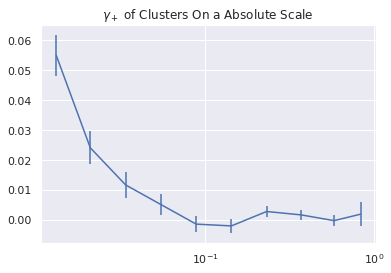

Aggregated xi:
[-16.717  -14.6608 -11.6137  -8.6942   3.4854   8.4807 -18.9801 -14.9334
   0.7105  -2.3711]
------------------------------------------------------------------------------
Aggregated meanlogr:
[-1315.6155 -2341.9318 -3325.8668 -4844.9345 -6680.3223 -8858.5949
 -9429.6057 -8151.0277 -3755.8425  -209.1196]
------------------------------------------------------------------------------
Aggregated npairs:
[ 304.  606.  983. 1672. 2758. 4560. 6445. 8206. 6911. 1150.]
------------------------------------------------------------------------------
Mean xi:
[-0.055  -0.0242 -0.0118 -0.0052  0.0013  0.0019 -0.0029 -0.0018  0.0001
 -0.0021]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3277 -3.8646 -3.3834 -2.8977 -2.4222 -1.9427 -1.4631 -0.9933 -0.5435
 -0.1818]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

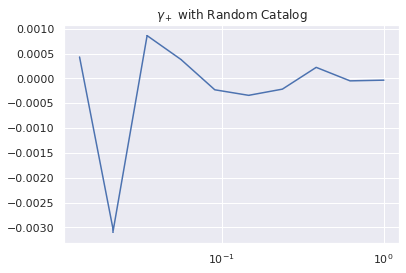

[ 4.3030e-04 -3.0562e-03  8.6036e-04  3.8116e-04 -2.2971e-04 -3.4155e-04
 -2.1683e-04  2.2134e-04 -5.0238e-05 -3.6069e-05]
[-6.8242e-06  4.8469e-05 -1.3645e-05 -6.0448e-06  3.6430e-06  5.4166e-06
  3.4386e-06 -3.5102e-06  7.9672e-07  5.7203e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

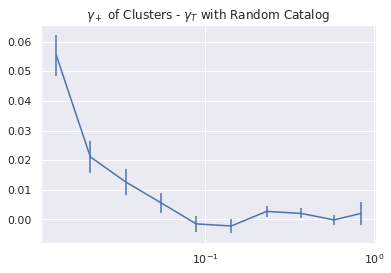

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

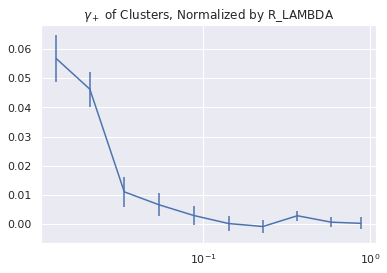

Aggregated xi:
[ -9.7574 -21.4088  -8.2887  -8.2782  -6.3734  -0.7914   4.2347 -21.6233
  -5.8306  -1.2609]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -742.4975 -1785.1766 -2530.2593 -3601.8457 -5188.8268 -6821.8582
 -7890.4551 -7493.3704 -4512.5569  -570.2725]
------------------------------------------------------------------------------
Aggregated npairs:
[ 172.  463.  748. 1238. 2137. 3500. 5336. 7461. 8376. 4228.]
------------------------------------------------------------------------------
Mean xi:
[-0.0567 -0.0462 -0.0111 -0.0067 -0.003  -0.0002  0.0008 -0.0029 -0.0007
 -0.0003]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3168 -3.8557 -3.3827 -2.9094 -2.4281 -1.9491 -1.4787 -1.0043 -0.5387
 -0.1349]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)